In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gdb
import plotly.express as px

In [28]:
# Load Data
users = pd.read_csv("./share-of-individuals-using-the-internet.csv")
happiness_report = pd.read_csv("./WHR20_DataForFigure2.1.csv")

In [29]:
# Data Cleaning
users_2020 = users[users["Year"] == 2020]
countries = set(happiness_report["Country name"].to_list())
for country in users_2020["Entity"]:
    if country not in countries:
        users_2020 = users_2020[users_2020["Entity"] != country]
import country_converter as coco
cc = coco.CountryConverter()
iso3_codes = cc.pandas_convert(series=happiness_report["Country name"], to='ISO3') 
happiness_report["Code"] = iso3_codes

In [30]:
# To get choropleth map of happiness scores
fig = px.choropleth(happiness_report, locations="Code", color="Ladder score", color_continuous_scale=px.colors.sequential.Plasma)
fig.show()

In [40]:
# Merge happiness score and internet users
merged = users_2020.merge(happiness_report, on="Code")
req_df = merged.iloc[:, [3, 6]]
req_df.head()

,Individuals using the Internet (% of population),Ladder score
0,18.400000,2.5669
1,72.239998,4.8827
2,62.900002,5.0051
3,85.500000,5.9747
4,76.510002,4.6768


In [45]:
import numpy as np
column = req_df.columns
nColumns = len(columns)
result = pd.DataFrame(np.zeros((nColumns, nColumns)), columns=column)
print(result)

   Individuals using the Internet (% of population)  Ladder score
0                                               0.0           0.0
1                                               0.0           0.0


In [63]:
from scipy.stats.stats import pearsonr
for col_a in range(nColumns):
    for col_b in range(nColumns):
        result.iloc[[col_a], [col_b]] = round(pearsonr(req_df.iloc[:, col_a], req_df.iloc[:, col_b])[0], 2)
print(result)

   Individuals using the Internet (% of population)  Ladder score
0                                              1.00          0.76
1                                              0.76          1.00


/var/folders/59/yqh58lbn63x9fkhfw81z_rzw0000gn/T/ipykernel_75317/2069620023.py:1: DeprecationWarning:

Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



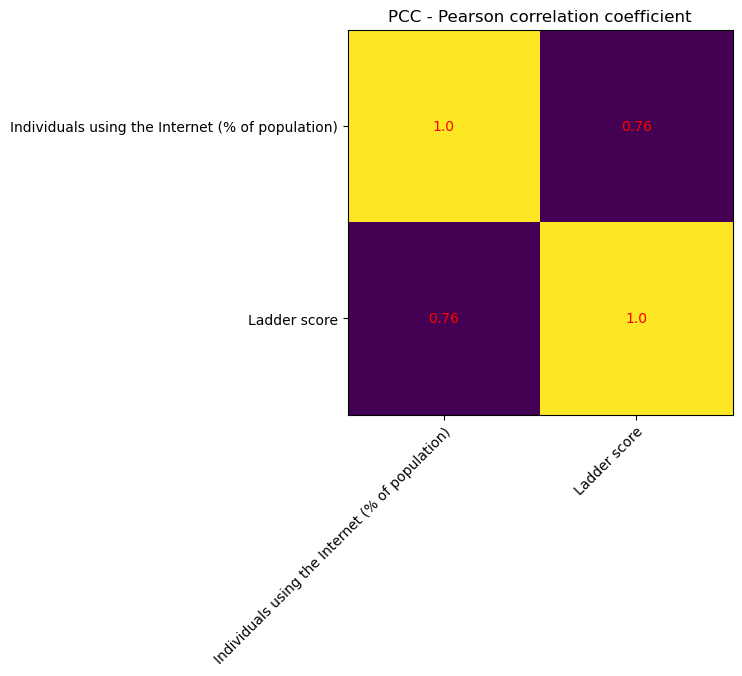

In [62]:
fig, ax = plt.subplots(figsize=(5,5))
im = ax.imshow(result)

ax.set_xticks(np.arange(nColumns))
ax.set_yticks(np.arange(nColumns))

ax.set_xticklabels(column)
ax.set_yticklabels(column)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

for i in range(nColumns):
    for j in range(nColumns):
        text = ax.text(j, i, result.iloc[i, j],ha="center", va="center", color="r")
                   
ax.set_title('PCC - Pearson correlation coefficient')
plt.show()